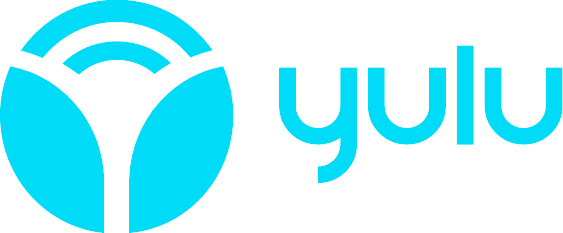

**About YULU**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

**Exploratory Data Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm
from scipy.stats import levene
from scipy.stats import kruskal
from scipy.stats import chi2_contingency

In [ ]:
#reading the txt file
df=pd.read_csv('bike_sharing.txt')

In [ ]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Datatype of following attributes needs to change to proper datatype


* datetime - to datetime
* season - to categorical
* holiday - to categorical
* workingday - to categorical
* weather - to categorical



In [ ]:
df['datetime']=pd.to_datetime(df['datetime'])

cat_cols=['season','holiday','workingday','weather']
for col in cat_cols:
  df[col]=df[col].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


**Challenge**

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

In [ ]:
#checking the count of bikes for rental each year
df['year']=df['datetime'].dt.year
total_count=df['count'].sum()
year_wise_count=df.groupby('year')['count'].sum()/total_count
year_wise_count

year
2011    0.374964
2012    0.625036
Name: count, dtype: float64

* Count of bikes for rental have increased shows increase in funds for resources thus if demand is same revenue should go up


In [ ]:
#checking for outliers and null values
df.describe(include='all')

<ipython-input-102-8ae4730b8112>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000


In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
dtype: int64

* There are no missing values in the dataset.

In [ ]:
#unique values in categorical columns
df[cat_cols].melt().groupby(['variable','value'])[['value']].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

**Univariate Analysis**

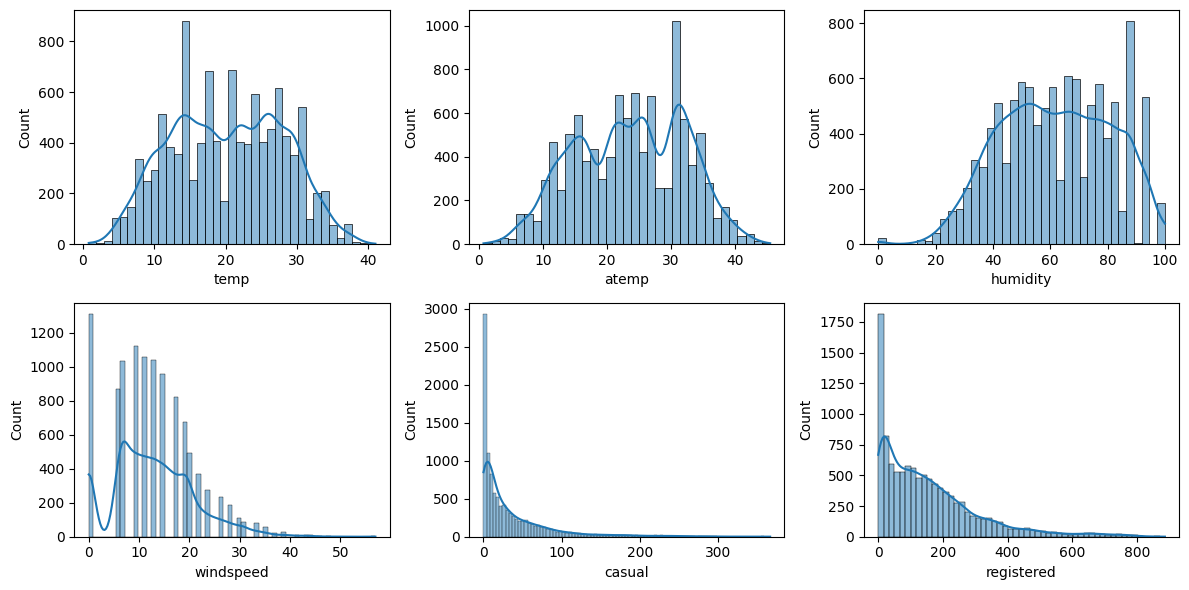

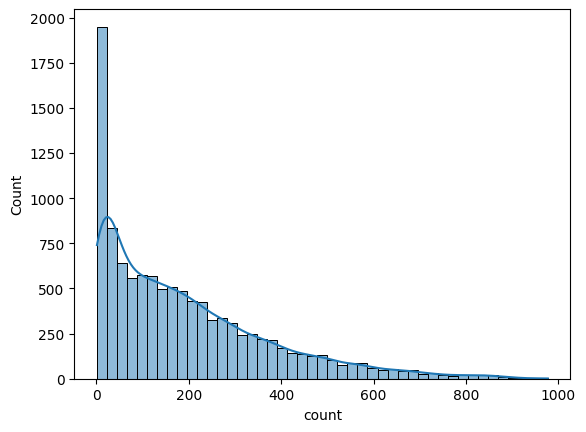

In [ ]:
#Distribution of each column vs count of each numerical column
num_cols=df.columns
num_cols=num_cols[5:]

fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(12,6))

count=0
for i in range(2):
  for j in range(3):
    sns.histplot(df[num_cols[count]],ax=axs[i][j],kde=True)
    count+=1

plt.tight_layout()
plt.show()

sns.histplot(df[num_cols[count]],kde=True)

plt.show()

* casual, registered and count somewhat looks like Log Normal
Distribution
* temp, atemp and humidity looks like they follows the Normal Distribution
* windspeed follows the binomial distribution

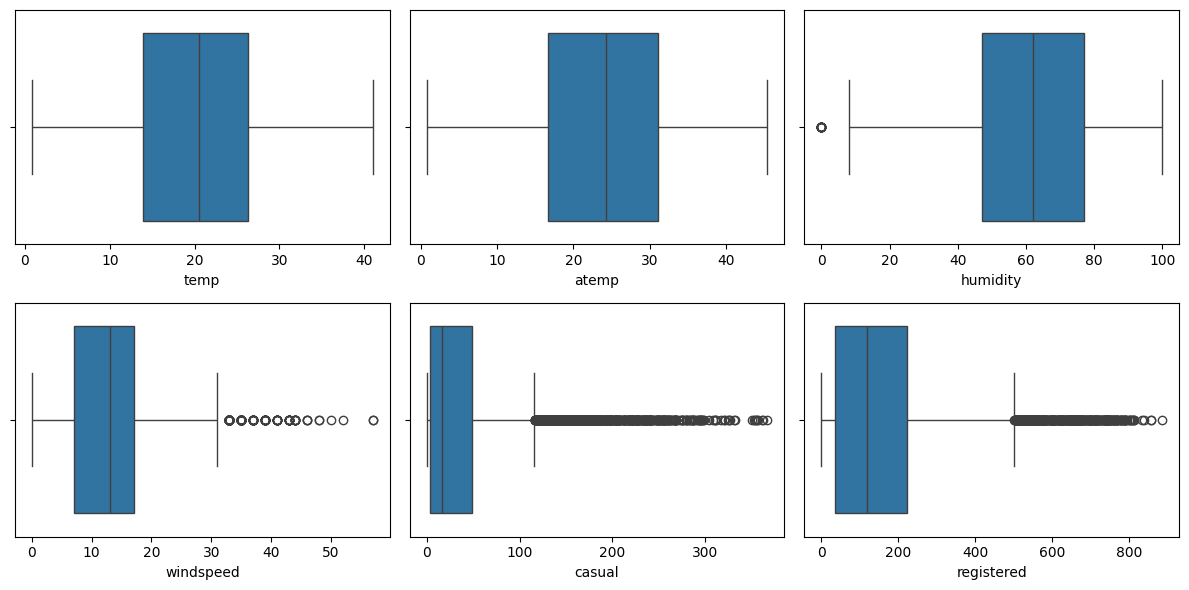

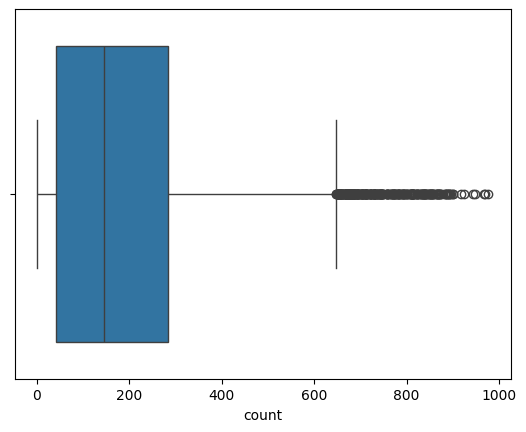

In [ ]:
#Boxplot for checking outliers
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(12,6))

index=0
for i in range(2):
  for j in range(3):
    sns.boxplot(x=df[num_cols[index]],ax=axs[i][j])
    index+=1

plt.tight_layout()
plt.show()

sns.boxplot(x=df[num_cols[index]])

plt.show()

Looks like humidity,windspeed, casual, registered and count have outliers in the data.

<ipython-input-107-f93e3a2644e3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col],palette='Set2')
<ipython-input-107-f93e3a2644e3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col],palette='Set2')
<ipython-input-107-f93e3a2644e3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col],palette='Set2')
<ipython-input-107-f93e3a2644e3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

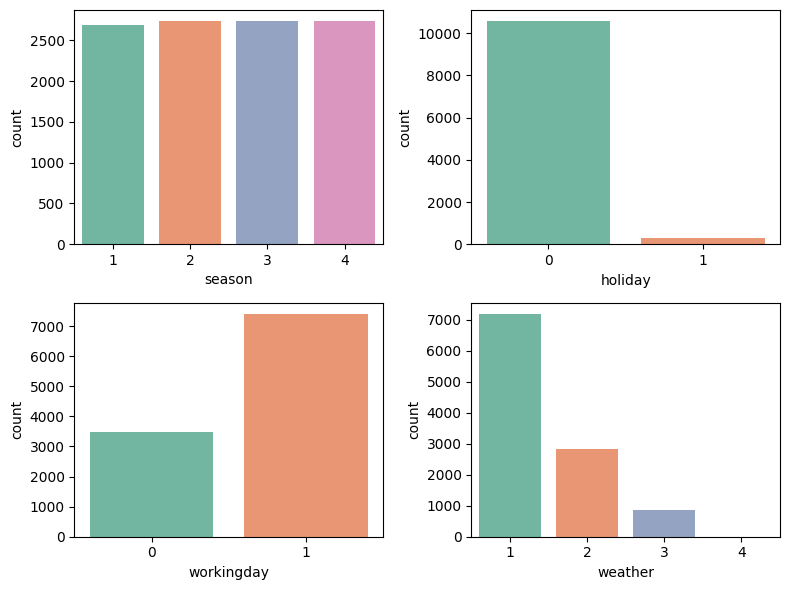

In [ ]:
#countplot to check the frequency of categorical column's groups
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
index = 0

for row in range(2):
  for col in range(2):

    sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col],palette='Set2')

    plt.tight_layout()
    index += 1
plt.show()

**Bi-variate Analysis**

<ipython-input-108-5d3f94ad4a30>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row,col],palette='Set2')
<ipython-input-108-5d3f94ad4a30>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row,col],palette='Set2')
<ipython-input-108-5d3f94ad4a30>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row,col],palette='Set2')
<ipython-input-108-5d3f94ad4a30>:6: FutureWarning: 

Passing `palette` without assign

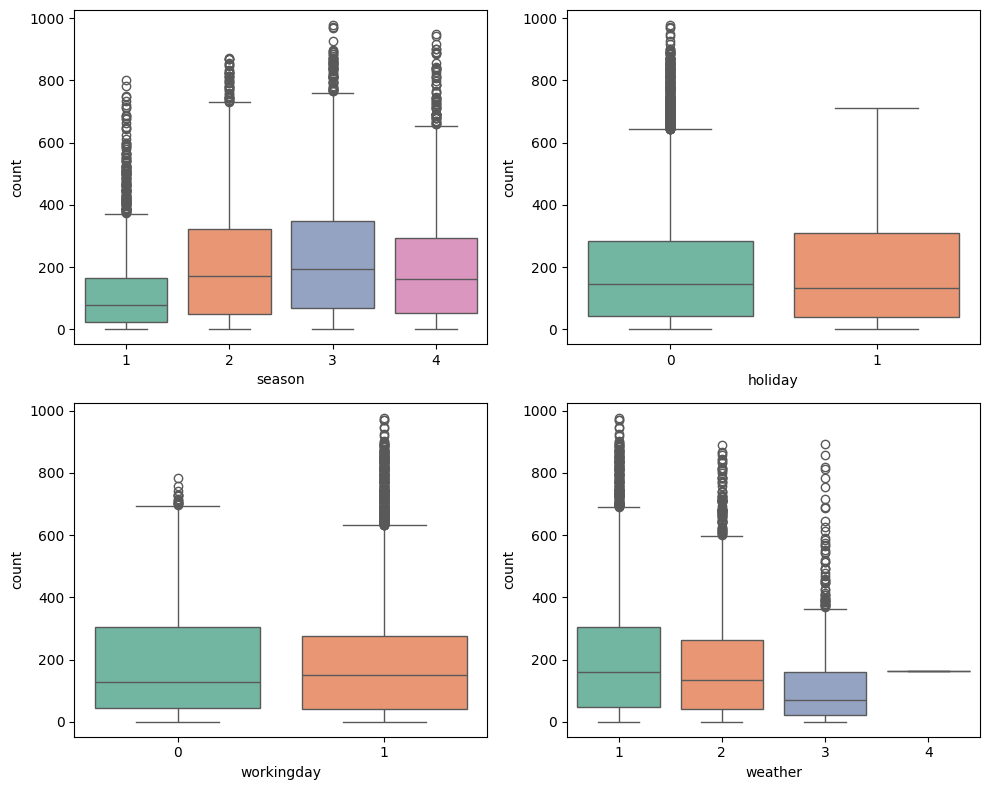

In [ ]:
#plotting categorical variable against count column using boxplot
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
index = 0
for row in range(2):
  for col in range(2):
    sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row,col],palette='Set2')
    index += 1
plt.tight_layout()
plt.show()

* In summer and fall seasons more bikes are rented as compared to other seasons.
* Whenever its a holiday more bikes are rented.
* It is also clear from the workingday also that whenever day is holiday or weekend, slightly
more bikes were rented.

* Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.

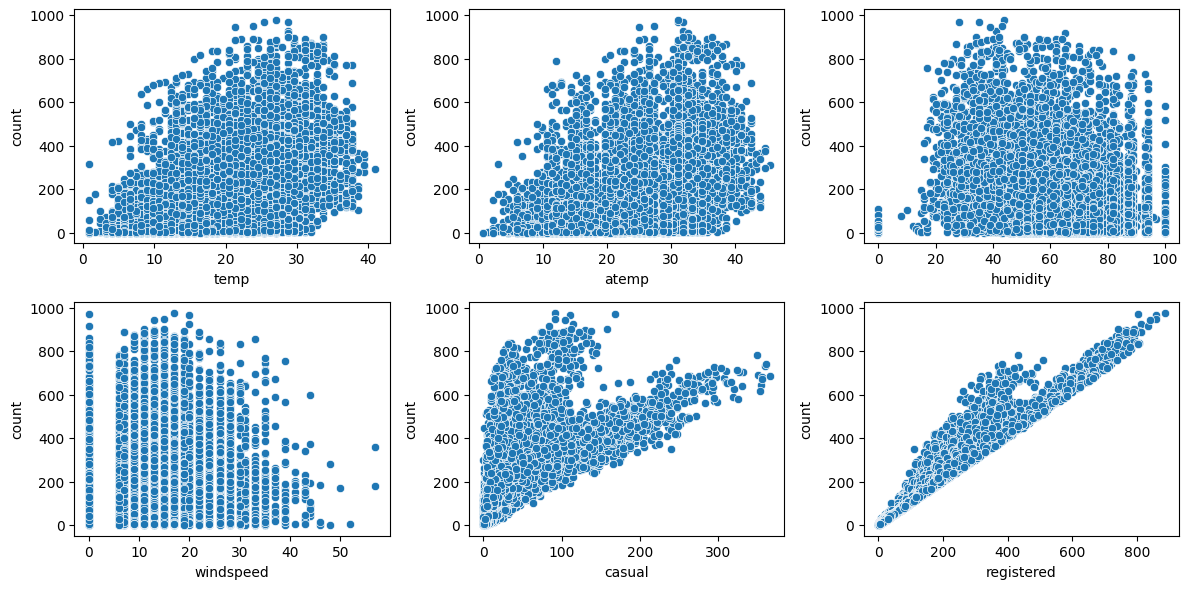

In [ ]:
# plotting numerical variables againt count using scatterplot
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
index = 0
for row in range(2):
  for col in range(3):
    sns.scatterplot(data=df, x=num_cols[index], y='count',ax=axis[row, col])
    index += 1
plt.tight_layout()
plt.show()

* Whenever the humidity is less than 20, number of bikes rented is very very low.
* Whenever the temperature is less than 10, number of bikes rented is less.
* Whenever the windspeed is greater than 35, number of bikes rented is less.

<ipython-input-110-6537e926fd8f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


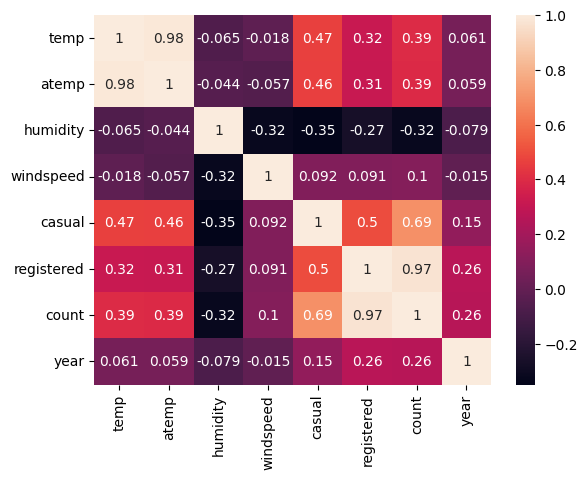

In [ ]:
# understanding the correlation between count and numerical columns
sns.heatmap(df.corr(), annot=True)
plt.show()

**Hypothesis Testing**

As we are about to check numerical column vs 2 categorical groups we will use 2 sample T-test

* **2 sample T-test:** Working Day has an effect on the number of electric cycles rented

* Null Hypothesis: Working day has no effect on number of electric cycles rented
* Alternate Hypothesis: Working day has effect on number of electric cycles rented are dependent

Assumptions:
* Whether the two samples data groups are independent.
* Whether the data elements in respective groups follow any normal distribution.
* Whether the given two samples have similar variances. This assumption is also known as the homogeneity assumption

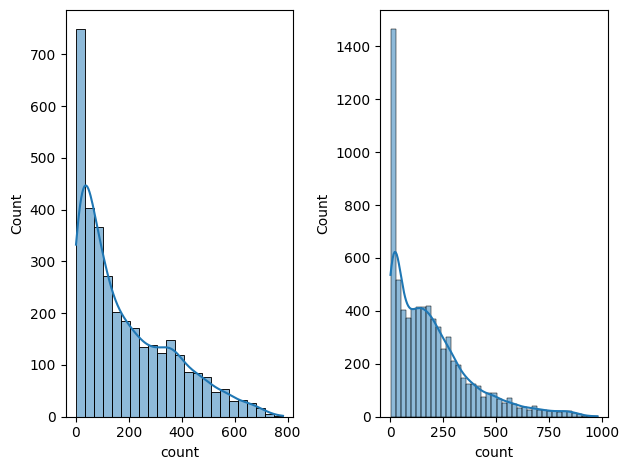

In [ ]:
#checking normality of groups
workingday1=df[df['workingday']==0]
workingday2=df[df['workingday']==1]

fig,axs=plt.subplots(nrows=1,ncols=2)

sns.histplot(workingday1['count'],kde=True,ax=axs[0])
sns.histplot(workingday2['count'],kde=True,ax=axs[1])

plt.tight_layout()
plt.show()

Both the groups have log normal distribution

In [ ]:
#checking Variances of groups
np.var(workingday1['count']),np.var(workingday2['count'])

(30171.346098942427, 34040.69710674686)

Both Variances are approximately equal

Assumption are holding true we can move forward with 2 sample T -test

In [ ]:
# 2sample T-test
tstat,p_value=ttest_ind(workingday1['count'],workingday2['count'])
tstat,p_value

(-1.2096277376026694, 0.22644804226361348)

Significance level=0.05

In [ ]:
#comparing p_value with significance level(alpha)

alpha=0.05
if p_value<alpha:
  print('Reject null hypothesis')
else:
  print('Failed to reject null hypothesis')

Failed to reject null hypothesis


Since pvalue is greater than 0.05 so we cannot reject the Null hypothesis. We don't
have the sufficient evidence to say that working day has effect on the number of
cycles being rented.

As we are about to check similarity between 2 categorical columns with more then 2 groups we will use Annova testing

* **ANNOVA:** to check if No. of cycles rented is similar or different in different 1. weather 2. season

* Null Hypothesis: Number of cycles rented is similar in different weathers and seasons
* Alternate Hypothesis:Number of cycles rented is different in different weathers and seasons

Assumptions:
* Normality – Each sample was drawn from a normally distributed population.
* Equal Variances – The variances of the populations that the samples come from are equal.
* Independence – The observations in each group are independent of each other and the observations within groups were obtained by a random sample.

In [ ]:
#checking normality of weather
weather1=df[df['weather']==1]['count'].values
weather2=df[df['weather']==2]['count'].values
weather3=df[df['weather']==3]['count'].values
weather4=df[df['weather']==4]['count'].values


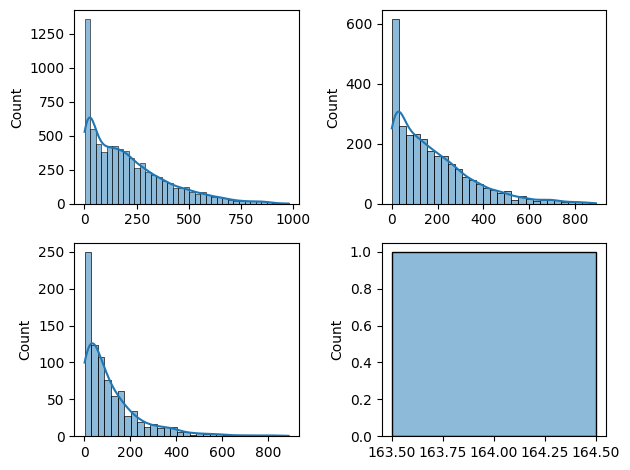

In [ ]:
weather_groups=[weather1,weather2,weather3,weather4]

fig,axs=plt.subplots(nrows=2,ncols=2)

index=0
for i in range(2):
  for j in range(2):
    sns.histplot(weather_groups[index],kde=True,ax=axs[i][j])
    index+=1

plt.tight_layout()
plt.show()

* 1,2,3 shows log normal distribution

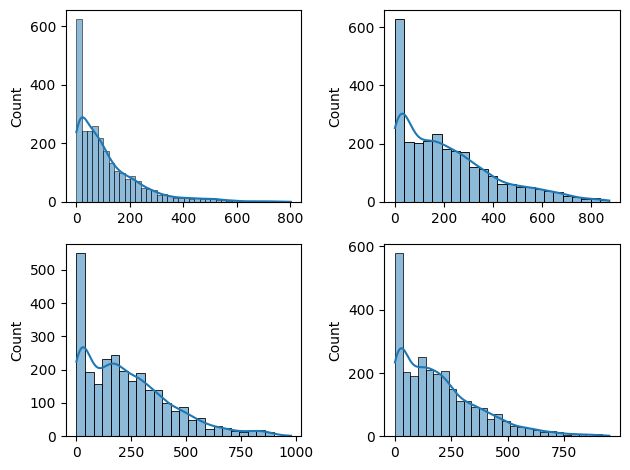

In [ ]:
#checking normality of season
season1=df[df['season']==1]['count'].values
season2=df[df['season']==2]['count'].values
season3=df[df['season']==3]['count'].values
season4=df[df['season']==4]['count'].values

season_groups=[season1,season2,season3,season4]

fig,axs=plt.subplots(nrows=2,ncols=2)

index=0
for i in range(2):
  for j in range(2):
    sns.histplot(season_groups[index],kde=True,ax=axs[i][j])
    index+=1

plt.tight_layout()
plt.show()


* All shows log normal distribution

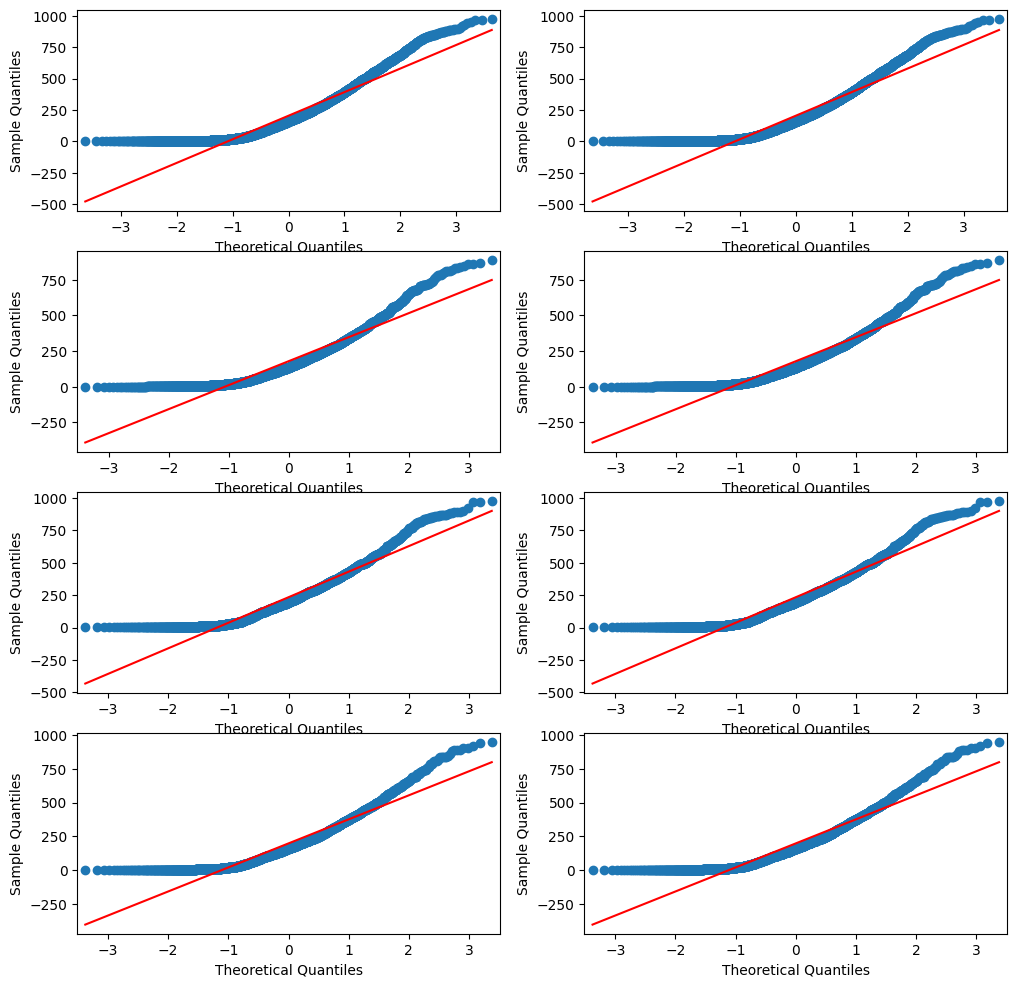

In [ ]:
#checking normality through qq plot
fig,axs=plt.subplots(nrows=4,ncols=2,figsize=(12,12))

index=0
for i in range(2):
  for j in range(2):
    sm.qqplot(weather_groups[i],ax=axs[i][j],line='s')


index=0
for i in range(2,4):
  for j in range(2):
    sm.qqplot(season_groups[i],ax=axs[i][j],line='s')


plt.show()



All the groups are not showing normal distribution

* Null Hypothesis: Variances is similar in different weather and season.
* Alternate Hypothesis: Variances is not similar in different weather
and season.
* Significance level (alpha): 0.05

In [ ]:
#checking for equal_variences
levene_stat,p_value=levene(weather1,weather2,weather3,weather4,season1,season2,season3,season4)
print('levene_stat',levene_stat,'p_value',p_value)

levene_stat 102.5026306304148 p_value 3.463531888897594e-148


p_value: 3.463531888897594e-148

Reject the Null hypothesis. Variances are not equal

As per QQ plot and Levene's Test, We cannot ANOVA Test.

**Assumptions of ANOVA fail, use Kruskal**

In [ ]:
#checking kruskal's test
kruskal_stat,p_value=kruskal(weather1,weather2,weather3,weather4,season1,season2,season3,season4)
print('kruskal_stat',kruskal_stat,'p_value',p_value)

kruskal_stat 904.7105757287106 p_value 4.614440933900297e-191


In [ ]:
#checking p_value with significance level
alpha=0.05
if p_value<alpha:
  print('Reject null hypothesis')
else:
  print('Failed to reject null hypothesis')

Reject null hypothesis


Since p-value is less than 0.05, we reject the null hypothesis. This implies that Number of cycles
rented is not similar in different weather and season conditions

**Chisquared test:**to check if Weather is dependent on the season

* Null Hypothesis: weather and season are independent
* Alternate Hypothesis: weather and season are dependent

In [ ]:
data=pd.crosstab(df['weather'],df['season'])
data

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [ ]:
chi2,p_value,dof,expected_value=chi2_contingency(data)
print('chi2_stat:',chi2)
print('p_value:',p_value)
print('dof:',dof)
print('expected_value:',expected_value)

chi2_stat: 49.15865559689363
p_value: 1.5499250736864862e-07
dof: 9
expected_value: [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]


In [ ]:
#comparing p_value with significance level
alpha=0.05
if p_value<alpha:
  print('Reject null hypothesis')
else:
  print('Failed to reject null hypothesis')

Reject null hypothesis


Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning
that Weather is dependent on the season.

**Insights**
* In summer and fall seasons more bikes are rented as compared to other seasons.
* Whenever its a holiday more bikes are rented.
* It is also clear from the workingday also that whenever day is holiday or weekend,
slightly more bikes were rented.
* Whenever there is rain, thunderstorm, snow or fog, there were less bikes were
rented.
* Whenever the humidity is less than 20, number of bikes rented is very very low.
* Whenever the temperature is less than 10, number of bikes rented is less.
* Whenever the windspeed is greater than 35, number of bikes rented is less.


**Recommendations**
* In summer and fall seasons the company should have more bikes in stock to be
rented. Because the demand in these seasons is higher as compared to other
seasons.
* With a significance level of 0.05, workingday has no effect on the number of bikes
being rented.
* In very low humid days, company should have less bikes in the stock to be rented.
* Whenever temperature is less than 10 or in very cold days, company should have
less bikes.
* Whenever the windspeed is greater than 35 or in thunderstorms, company should
have less bikes in stock to be rented.